In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
cpi_data = pd.read_csv("cpi_data.csv")
cpi_data

,DATE,CPIAUCSL
0,1974-01-01,46.800
1,1974-02-01,47.300
2,1974-03-01,47.800
3,1974-04-01,48.100
4,1974-05-01,48.600
...,...,...
596,2023-09-01,307.288
597,2023-10-01,307.531
598,2023-11-01,308.024
599,2023-12-01,308.742


In [3]:
gdp_data = pd.read_csv("gdp_data.csv")
gdp_data

,DATE,GDP
0,1974-01-01,1491.209
1,1974-04-01,1530.056
2,1974-07-01,1560.026
3,1974-10-01,1599.679
4,1975-01-01,1616.116
...,...,...
196,2023-01-01,26813.601
197,2023-04-01,27063.012
198,2023-07-01,27610.128
199,2023-10-01,27956.998


In [4]:
unemp = pd.read_csv("unemployment_data.csv")
unemp

,DATE,UNRATE
0,1974-01-01,5.1
1,1974-02-01,5.2
2,1974-03-01,5.1
3,1974-04-01,5.1
4,1974-05-01,5.1
...,...,...
596,2023-09-01,3.8
597,2023-10-01,3.8
598,2023-11-01,3.7
599,2023-12-01,3.7


In [5]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      601 non-null    object 
 1   CPIAUCSL  601 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [6]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    201 non-null    object 
 1   GDP     201 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [7]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    601 non-null    object 
 1   UNRATE  601 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:

# Sample data setup (replace this with your actual data loading)
# Ensure 'DATE' columns are converted to datetime
df1 = pd.DataFrame({'DATE': pd.date_range(start='2000-01-01', periods=601, freq='M'), 'CPIAUCSL': np.random.randn(601)})
df2 = pd.DataFrame({'DATE': pd.date_range(start='2000-01-01', periods=201, freq='Q'), 'GDP': np.random.randn(201)})
df3 = pd.DataFrame({'DATE': pd.date_range(start='2000-01-01', periods=601, freq='M'), 'UNRATE': np.random.randn(601)})

# Convert DATE to datetime and merge datasets on DATE
df1['DATE'] = pd.to_datetime(df1['DATE'])
df2['DATE'] = pd.to_datetime(df2['DATE'])
df3['DATE'] = pd.to_datetime(df3['DATE'])

# Merge all datasets on DATE (left join to retain all CPIAUCSL and UNRATE data)
df = df1.merge(df2, on='DATE', how='left').merge(df3, on='DATE', how='left')

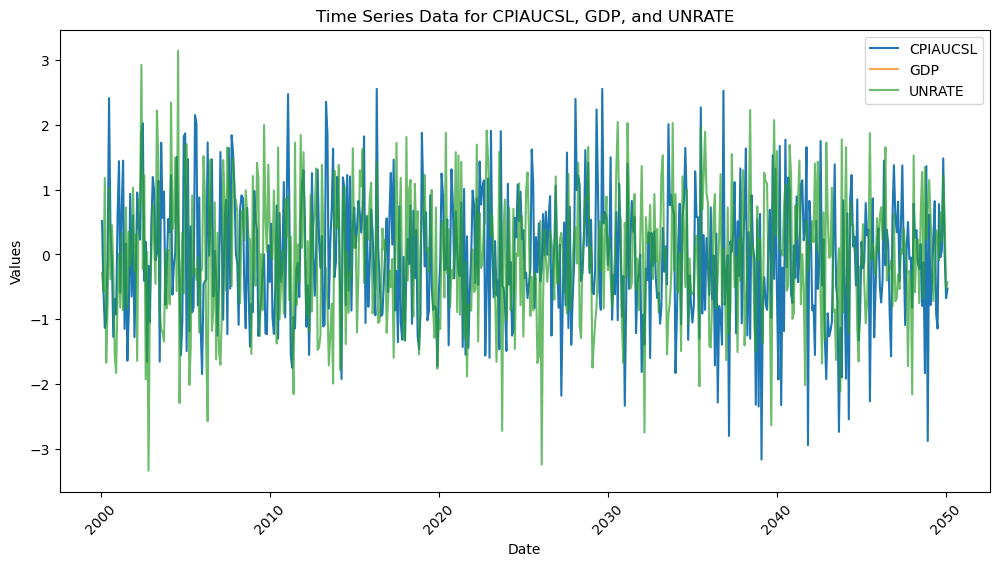

In [10]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['CPIAUCSL'], label='CPIAUCSL')
plt.plot(df['DATE'], df['GDP'], label='GDP', alpha=0.7)
plt.plot(df['DATE'], df['UNRATE'], label='UNRATE', alpha=0.7)
plt.legend()
plt.title('Time Series Data for CPIAUCSL, GDP, and UNRATE')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

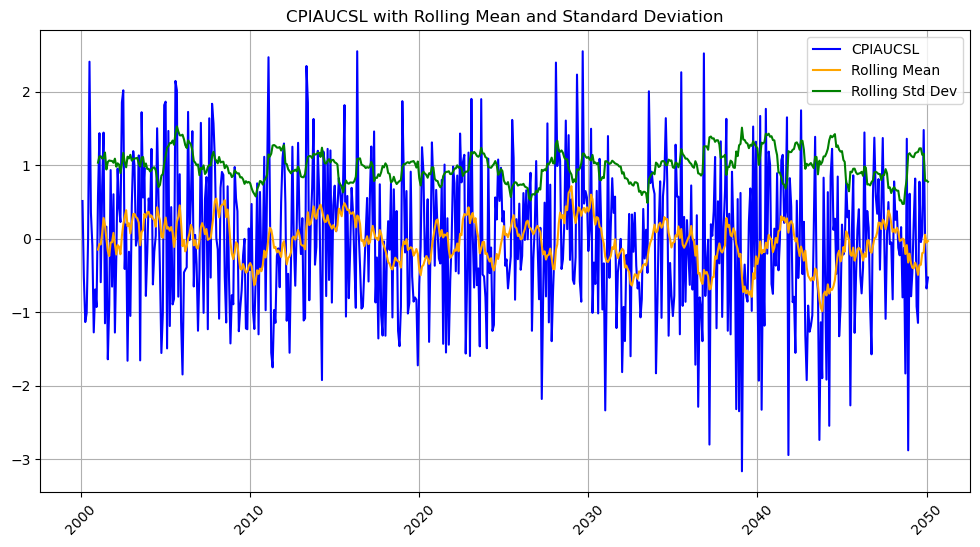

In [11]:
# 3. Rolling Mean and Standard Deviation for CPIAUCSL
df['CPIAUCSL_rolling_mean'] = df['CPIAUCSL'].rolling(window=12).mean()
df['CPIAUCSL_rolling_std'] = df['CPIAUCSL'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['CPIAUCSL'], label='CPIAUCSL', color='blue')
plt.plot(df['DATE'], df['CPIAUCSL_rolling_mean'], label='Rolling Mean', color='orange')
plt.plot(df['DATE'], df['CPIAUCSL_rolling_std'], label='Rolling Std Dev', color='green')
plt.title('CPIAUCSL with Rolling Mean and Standard Deviation')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


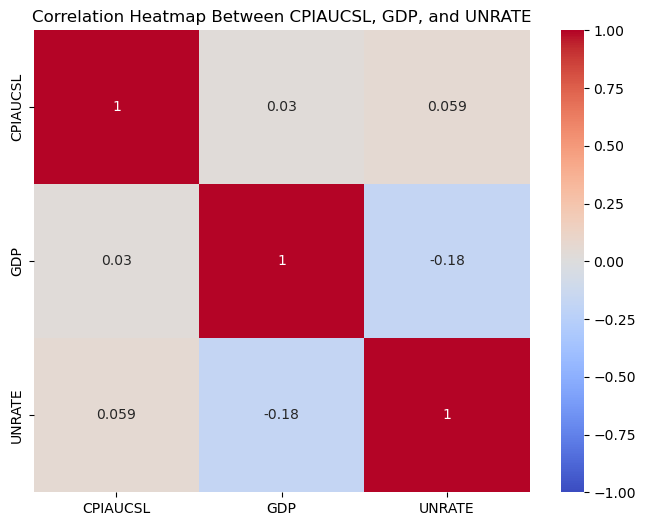

In [12]:
# 4. Correlation Heatmap Between CPIAUCSL, GDP, and UNRATE
df_corr = df[['CPIAUCSL', 'GDP', 'UNRATE']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between CPIAUCSL, GDP, and UNRATE')
plt.show()

<Figure size 1200x600 with 0 Axes>

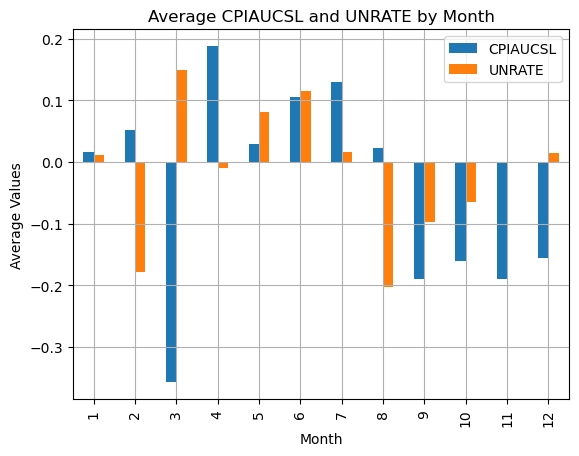

In [13]:
# 5. Seasonality Check - Monthly Average for CPIAUCSL and UNRATE
df['Month'] = df['DATE'].dt.month

monthly_avg = df.groupby('Month').mean()[['CPIAUCSL', 'UNRATE']]

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average CPIAUCSL and UNRATE by Month')
plt.ylabel('Average Values')
plt.grid(True)
plt.show()

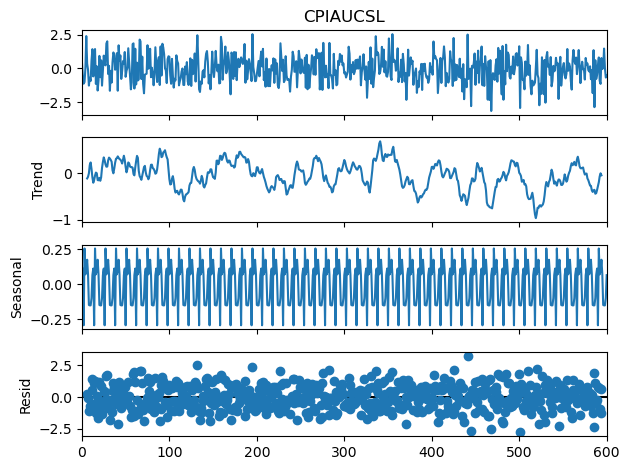

In [14]:
# Decompose the CPIAUCSL time series to observe trend, seasonality, and residual
decompose_result = seasonal_decompose(df['CPIAUCSL'].dropna(), model='additive', period=12)
decompose_result.plot()
plt.show()

In [15]:
# Fit ARIMA model to CPIAUCSL (You can adjust p, d, q based on ACF and PACF)
model = ARIMA(df['CPIAUCSL'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

In [16]:

# Summary of the model
print(model_fit.summary())

# Forecast next 10 periods
forecast = model_fit.forecast(steps=10)
print(f"Forecast: {forecast}")


                               SARIMAX Results                                
Dep. Variable:               CPIAUCSL   No. Observations:                  601
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -859.892
Date:                Thu, 26 Sep 2024   AIC                           1725.784
Time:                        15:53:59   BIC                           1738.974
Sample:                             0   HQIC                          1730.919
                                - 601                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0351      0.042     -0.834      0.404      -0.117       0.047
ma.L1         -0.9927      0.006   -160.603      0.000      -1.005      -0.981
sigma2         1.0215      0.065     15.837      0.0

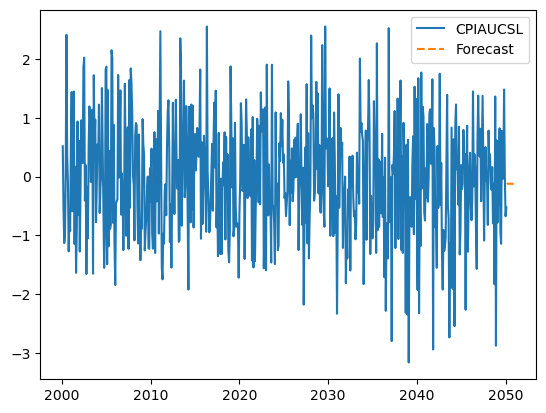

In [17]:
# Plot forecast
plt.plot(df['DATE'], df['CPIAUCSL'], label='CPIAUCSL')
plt.plot(pd.date_range(df['DATE'].iloc[-1], periods=11, freq='M')[1:], forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                           CPIAUCSL   No. Observations:                  601
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -864.720
Date:                            Thu, 26 Sep 2024   AIC                           1739.440
Time:                                    15:54:06   BIC                           1761.324
Sample:                                         0   HQIC                          1747.967
                                            - 601                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0313      0.042     -0.748      0.455      -0.113       0.051
ma.L1         -0.9997      0.290   

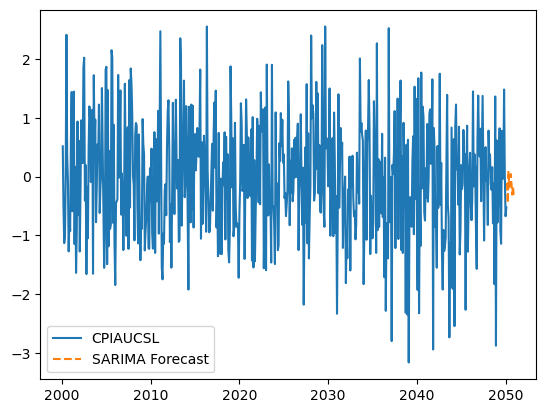

In [18]:
# Fit SARIMA model to account for seasonality (Seasonal order can be adjusted based on analysis)
sarima_model = SARIMAX(df['CPIAUCSL'].dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# SARIMA summary and forecast
print(sarima_fit.summary())
sarima_forecast = sarima_fit.forecast(steps=10)

# Plot SARIMA forecast
plt.plot(df['DATE'], df['CPIAUCSL'], label='CPIAUCSL')
plt.plot(pd.date_range(df['DATE'].iloc[-1], periods=11, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.show()